Progetto di Fondamenti di Scienza dei dati e Laboratorio
A.A. 2023/2024
Santarosssa Riccardo


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Creazione dei dataframe utilizzando i file .csv
allShips = pd.read_excel('../UNI_DataScienceProject/DataSets/allShips.xlsx').dropna()
premiumShips = pd.read_excel('../UNI_DataScienceProject/DataSets/premiumShips.xlsx').dropna()
freeShips = pd.read_excel('../UNI_DataScienceProject/DataSets/freeShips.xlsx').dropna()
standardShips = pd.read_excel('../UNI_DataScienceProject/DataSets/standardShips.xlsx').dropna()



#Correzione di alcuni tipi di valori salvati nel set come stringhe
allShips['Battles'] = allShips['Battles'].str.replace(' ', '')
allShips['Battles'] = pd.to_numeric(allShips['Battles'], downcast = "integer")

#Righe risultate problematiche durante la conversione in intero
allShips = allShips.drop(368)
allShips = allShips.drop(375)

allShips['Battles'] = allShips['Battles'].values.astype(np.int64)
allShips['Tier'] = allShips['Tier'].values.astype(np.int64)
allShips['Avg. damage'] = allShips['Avg. damage'].str.replace(' ', '')
allShips['Avg. damage'] = pd.to_numeric(allShips['Avg. damage'], downcast = "integer")

#Eliminazione della colonna con formato errato e non necessaria
allShips = allShips.drop('Avg. experience', axis = 1)


In [2]:
#Costruzione del dataset con i miei dati (fonte: https://wows-numbers.com/)

ships = pd.Series(["Königsberg", "Langley", "Raimondo Montecuccoli", "Oktyabrskaya Revolutsiya", "Conte di Cavour", "Toulon", "Clemson", "T-22", 
                  "Karlsruhe", "Svietlana", "Kolberg", "Nicholas", "Bogatyr", "Orion", "Alberto di Giussano", "Arizona", "Maestrale", "Iron Duke", 
                  "V-170", "Taranto", "South Carolina", "Nazario Sauro", "Bellerophon", "Isokaze", "Curtatone", "Nino Bixio", "Dunquerque",
                  "Dante Alighieri", "Erie"])
tier = pd.Series([5, 4, 5, 5, 5, 7, 4, 5,
                 4, 4, 3, 5, 3, 4, 4, 6, 5, 5,
                 4, 3, 3, 3, 3, 4, 2, 2, 6, 
                 4, 1])
shipTipe = pd.Series(["Cruiser", "Aircraft Carrier", "Cruiser", "Battleship", "Battleship", "Cruiser", "Destroyer", "Destroyer",
                     "Cruiser", "Cruiser", "Cruiser", "Destroyer", "Cruiser", "Battleship", "Cruiser", "Battleship", "Destroyer", "Battleship",
                     "Destroyer", "Cruiser", "Battleship", "Cruiser", "Battleship", "Destroyer", "Destroyer", "Cruiser", "Battleship",
                      "Battleship", "Cruiser"])
nations = pd.Series(["Germany", "U.S.A.", "U.S.S.R.", "Italy", "France", "U.S.A.", "Germany",
                    "Germany", "U.S.S.R.", "Germany", "U.S.A." "U.S.S.R.", "U.K.", "Italy", "U.S.A.", "Italy", "U.K.",
                    "Germany", "Italy", "U.S.A.", "Italy", "U.K.", "Japan", "Italy", "Italy", "France",
                    "Italy", "U.S.A."])
battles = pd.Series([40, 18, 17, 16, 12, 11, 10, 10,
                    9, 8, 8, 8, 8, 8, 7, 7, 6, 6,
                    5, 5, 4, 4, 3, 3, 3, 2, 1,
                    1, 1])
winrate = pd.Series([0.3250, 0.4444, 0.5294, 0.3750, 0.3333, 0.6364, 0.6000, 0.6000,
                    0.4444, 0.3750, 0.5000, 0.5000, 0.3750, 0.6250, 0.4286, 0.4286, 0.1667, 0.4000,
                    0.4000, 0.4000, 0.7500, 0.5000, 0.6667, 0.0000, 0.3333, 0.5000, 1.0000,
                    1.0000, 0.0000])
frags = pd.Series([0.30, 0.28, 0.29, 0.63, 0.42, 0.73, 2.40, 0.70,
                  2.22, 1.88, 1.75, 0.25, 1.25, 1.38, 0.43, 0.71, 0.17, 0.40,
                  1.00, 0.80, 1.75, 1.25, 0.67, 1.33, 1.67, 1.50, 0.00,
                  1.00, 0.00])
dmg = pd.Series([12761, 19388, 8266, 23501, 18510, 26481, 33608, 8285, 
                 41662, 31753, 35807, 4181, 29662, 41810, 19425, 32557, 2325, 34000,
                 23217, 18401, 47259, 31360, 20941, 26917, 24523, 27659, 10394, 
                 59023, 11680])

myStatsSet = pd.DataFrame({'Warship' : ships, 'Tier': tier, 'Type' : shipTipe, 'Nation': nations, 'Battles' : battles,
                          'Win rate' : winrate, 'Avg. frags' : frags, 'Avg. damage' : dmg})



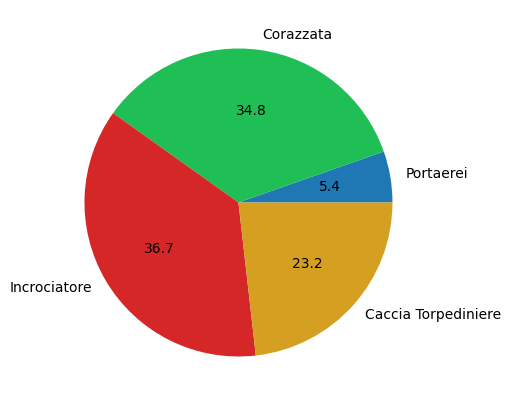

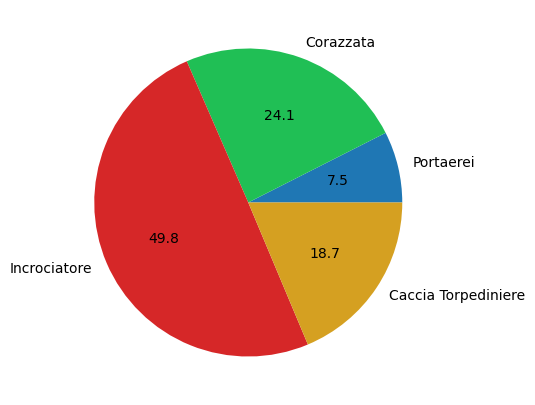

In [3]:
#Distribuzione della tipologia di navi giocate da me e dal server pubblico

#Raggruppamento e somma delle battaglie per ogni classe navale
battleCount = allShips.groupby(['Type'])['Battles'].sum().reset_index()
myBattleCount = myStatsSet.groupby(['Type'])['Battles'].sum().reset_index()

myBattleCount

#Grafico a torta che definisce la distribuzione di utilizzo dei vari tipi di nave nel server europeo
plt.figure(figsize = (8,5))
labels = ['Portaerei', 'Corazzata', 'Incrociatore', 'Caccia Torpediniere']
colors = ['#1F77B4', '#20BF55', '#D62728', '#D5A021']
plt.pie(battleCount['Battles'], labels = labels, colors = colors, autopct='%.1f')
plt.show()

#Grafico a torta che definisce la distribuzione di utilizzo dei vari tipi di nave nel mio account
plt.figure(figsize = (8,5))
lbls = ['Portaerei', 'Corazzata', 'Incrociatore', 'Caccia Torpediniere']
plt.pie(myBattleCount['Battles'], labels = lbls, colors = colors, autopct='%.1f')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (6,).

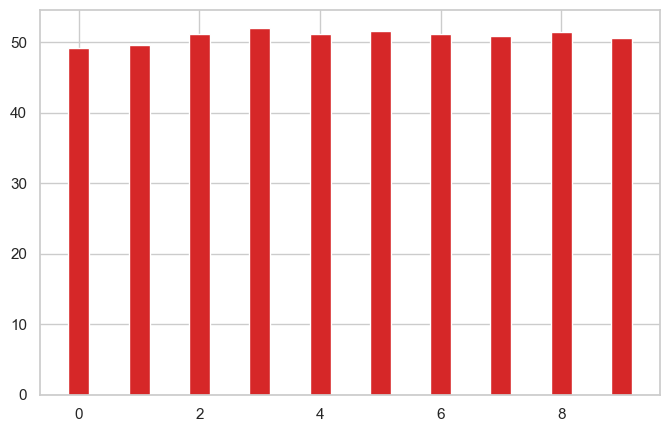

In [24]:
#Piccola panoramica dei dati confrontati ai miei 
#Winrate del tipo "Cruiser" sul server europeo a confronto con il mio, diviso per Tier

#Filtro dei dati per tipologia di nave e per navi da me possedute
cruiserData = allShips[allShips['Type'] == 'Cruiser'].copy()
myCruiserData = myStatsSet[myStatsSet['Type'] == 'Cruiser'].copy()

cruiserData['Win rate'] = cruiserData['Win rate']*100
myCruiserData['Win rate'] = myCruiserData['Win rate']*100

#Raggruppo il winrate medio per ogni tier
groupedCrData = cruiserData.groupby(['Tier'])['Win rate'].mean().round(2).reset_index()
myGroupedData = myCruiserData.groupby(['Tier'])['Win rate'].mean().round(2).reset_index()

#Creazione della figura
sns.set(style="whitegrid")
plt.figure(figsize = (8, 5))

#Creazione dei grafici affiancati
numTiers = 10
larghBarre = 0.35
startPoint = np.arange(numTiers)

plt.bar(startPoint, groupedCrData['Win rate'], larghBarre, color='#D62728', label='Server pubblico')
plt.bar(startPoint + larghBarre, myGroupedData['Win rate'], larghBarre, color='#1F77B4', label='Player account')
plt.xlabel('Tier della nave')
plt.ylabel('Winrate in %')
plt.title('Confronto del winrate tra il mio account e il server pubblico')
plt.show()

In [111]:
#Analisi dei miei cruiser al Tier 7 per vedere come la mia performance è rapportata rispetto al server europeo

#Estrazione dei miei cruisers tier 7 
myTier7Cruisers = myStatsSet[ (myStatsSet['Type'] == 'Cruiser') & (myStatsSet['Tier'] == 7.0)].copy()
myTier7Cruisers = myTier7Cruisers.drop(['Nation', 'Battles'], axis = 1)
display(myTier7Cruisers)

#Estrazione dei valori medi dei cruisers tier 7 per il server europeo
serverT7Cruisers = allShips[(allShips['Type'] == 'Cruiser') & (allShips['Tier'] == 7.0)].copy()
serverT7Cruisers = serverT7Cruisers.drop(['Nation', 'Avg. planes destroyed', 'Kills / deaths'], axis = 1)

#Creazione di un set formato dalle medie delle statistiche del server europeo
meanData = [{'Type' : 'Cruiser', 'Win rate' : serverT7Cruisers['Win rate'].mean(),
            'Avg frags' : serverT7Cruisers['Avg. frags'].mean(), 'Avg. damage' : serverT7Cruisers['Avg. damage'].mean()}]
meanT7Set = pd.DataFrame(meanData)

meanT7Set

,Warship,Tier,Type,Win rate,Avg. frags,Avg. damage
5,Toulon,7.0,Cruiser,0.6364,0.73,26481


,Type,Win rate,Avg frags,Avg. damage
0,Cruiser,0.511973,0.708182,37330.409091
